In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
from citipy import citipy
import time
import json
import time

In [4]:
# Run to get a random set of longitude and latitude coordinates
lat = np.random.uniform(-90,90, size = 600)
long = np.random.uniform(-180,180, size = 600)

cities_df=pd.DataFrame({"Latitude": lat, "Longitude": long})
cities_df.head()

,Latitude,Longitude
0,84.610133,124.964617
1,62.160507,-103.515971
2,69.940338,-173.629796
3,86.289443,-144.331367
4,-5.575209,163.779857


In [10]:
# create columns for cities ** Note: be sure to also include "country", because "city" alone only gives vague data 

cities_df["City"] = ""
cities_df["Country"] = ""

#writing city and country into City and Country columns
for index, row in cities_df.iterrows(): 
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)  

cities_df=cities_df.drop_duplicates(["City"], keep='first')        

cities_df.head()


,Latitude,Longitude,City,Country
0,84.610133,124.964617,tiksi,ru
1,62.160507,-103.515971,la ronge,ca
2,69.940338,-173.629796,lavrentiya,ru
3,86.289443,-144.331367,barrow,us
4,-5.575209,163.779857,auki,sb


In [13]:
# Build the API URL
akey = "8e0c33f0275874016933c37946cb8134"
url = "http://api.openweathermap.org/data/2.5/weather?q="

# adding new columns
cities_df["Temperature"] = ""
cities_df["Humidity"] = ""
cities_df["Clouds"] = ""
cities_df["Wind"] = ""

SleepCounter = 0
PullCounter = 0
BatchCounter = 1

In [14]:
# Loop through the APIs to construct new columns in df

for index, row in cities_df.iterrows():
    try:
        query = query = url + row["City"].replace(" ","+") + "," + row["Country"] + "&appid=" + akey + "&units=imperial"
        get = req.get(query)
        getjson = get.json()
        cities_df.set_value(index, "Temperature", getjson["main"]["temp"])
        cities_df.set_value(index, "Humidity", getjson["main"]["humidity"])
        cities_df.set_value(index, "Clouds", getjson["clouds"]["all"])
        cities_df.set_value(index, "Wind", getjson["wind"]["speed"])
    except:
        cities_df.set_value(index, "Temperature", "FAIL")
    
    PullCounter += 1
    
    SleepCounter += 1
    
    # If loop to ensure not overloading the weather API
    if SleepCounter == 50:
        print("~~~ sleep ~~~")
        time.sleep(10)
        print("")
        SleepCounter = 0
        BatchCounter += 1
    
    # Printing API link
    print("----- begin request -----")
    print("Processing Record " + str(PullCounter) + " of Set " + str(BatchCounter) +" | " + row["City"])
    print(query)
    print("--- request complete ---")



----- begin request -----
Processing Record 1 of Set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 2 of Set 1 | la ronge
http://api.openweathermap.org/data/2.5/weather?q=la+ronge,ca&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 3 of Set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?q=lavrentiya,ru&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 4 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?q=barrow,us&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 5 of Set 1 | auki
http://api.openweathermap.org/data/2.5/weather?q=auki,sb&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- reque

----- begin request -----
Processing Record 41 of Set 1 | karkaralinsk
http://api.openweathermap.org/data/2.5/weather?q=karkaralinsk,kz&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 42 of Set 1 | isangel
http://api.openweathermap.org/data/2.5/weather?q=isangel,vu&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 43 of Set 1 | karratha
http://api.openweathermap.org/data/2.5/weather?q=karratha,au&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 44 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton,au&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 45 of Set 1 | rungata
http://api.openweathermap.org/data/2.5/weather?q=rungata,ki&appid=8e0c33f0275874016933c37946cb8134

----- begin request -----
Processing Record 81 of Set 2 | lebu
http://api.openweathermap.org/data/2.5/weather?q=lebu,cl&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 82 of Set 2 | baykit
http://api.openweathermap.org/data/2.5/weather?q=baykit,ru&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 83 of Set 2 | assiniboia
http://api.openweathermap.org/data/2.5/weather?q=assiniboia,ca&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 84 of Set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?q=hilo,us&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 85 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife,ca&appid=8e0c33f0275874016933c37946cb8134&units=imperial


----- begin request -----
Processing Record 121 of Set 3 | tortoli
http://api.openweathermap.org/data/2.5/weather?q=tortoli,it&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 122 of Set 3 | manubul
http://api.openweathermap.org/data/2.5/weather?q=manubul,ph&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 123 of Set 3 | warri
http://api.openweathermap.org/data/2.5/weather?q=warri,ng&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 124 of Set 3 | sorland
http://api.openweathermap.org/data/2.5/weather?q=sorland,no&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 125 of Set 3 | oranjestad
http://api.openweathermap.org/data/2.5/weather?q=oranjestad,aw&appid=8e0c33f0275874016933c37946cb8134&units=im

----- begin request -----
Processing Record 161 of Set 4 | pisco
http://api.openweathermap.org/data/2.5/weather?q=pisco,pe&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 162 of Set 4 | kars
http://api.openweathermap.org/data/2.5/weather?q=kars,tr&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 163 of Set 4 | tirano
http://api.openweathermap.org/data/2.5/weather?q=tirano,it&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 164 of Set 4 | zaplyusye
http://api.openweathermap.org/data/2.5/weather?q=zaplyusye,ru&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 165 of Set 4 | hemsedal
http://api.openweathermap.org/data/2.5/weather?q=hemsedal,no&appid=8e0c33f0275874016933c37946cb8134&units=imperial
-

----- begin request -----
Processing Record 201 of Set 5 | kundiawa
http://api.openweathermap.org/data/2.5/weather?q=kundiawa,pg&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 202 of Set 5 | palma
http://api.openweathermap.org/data/2.5/weather?q=palma,es&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 203 of Set 5 | samusu
http://api.openweathermap.org/data/2.5/weather?q=samusu,ws&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 204 of Set 5 | cabedelo
http://api.openweathermap.org/data/2.5/weather?q=cabedelo,br&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 205 of Set 5 | marcona
http://api.openweathermap.org/data/2.5/weather?q=marcona,pe&appid=8e0c33f0275874016933c37946cb8134&units=imperi

----- begin request -----
Processing Record 241 of Set 5 | amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 242 of Set 5 | colima
http://api.openweathermap.org/data/2.5/weather?q=colima,mx&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 243 of Set 5 | clifton springs
http://api.openweathermap.org/data/2.5/weather?q=clifton+springs,au&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 244 of Set 5 | paamiut
http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 245 of Set 5 | mpika
http://api.openweathermap.org/data/2.5/weather?q=mpika,zm&appid=8e0c33f0275874016933c37946cb8134&

----- begin request -----
Processing Record 281 of Set 6 | asau
http://api.openweathermap.org/data/2.5/weather?q=asau,tv&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 282 of Set 6 | sur
http://api.openweathermap.org/data/2.5/weather?q=sur,om&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 283 of Set 6 | nyurba
http://api.openweathermap.org/data/2.5/weather?q=nyurba,ru&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 284 of Set 6 | sinnamary
http://api.openweathermap.org/data/2.5/weather?q=sinnamary,gf&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- request complete ---
----- begin request -----
Processing Record 285 of Set 6 | awjilah
http://api.openweathermap.org/data/2.5/weather?q=awjilah,ly&appid=8e0c33f0275874016933c37946cb8134&units=imperial
--- req

In [18]:
# remove rows without data 
summary_df = cities_df.loc[cities_df["Temperature"] != "FAIL", :]
print(summary_df.count())
summary_df.head()

Latitude       262
Longitude      262
City           262
Country        262
Temperature    262
Humidity       262
Clouds         262
Wind           262
dtype: int64


,Latitude,Longitude,City,Country,Temperature,Humidity,Clouds,Wind
0,84.610133,124.964617,tiksi,ru,-35.29,66,12,3.15
1,62.160507,-103.515971,la ronge,ca,-4.01,70,90,12.75
2,69.940338,-173.629796,lavrentiya,ru,17.82,99,24,5.5
3,86.289443,-144.331367,barrow,us,33.8,53,1,13.87
4,-5.575209,163.779857,auki,sb,77.67,100,92,8.97


In [ ]:
#Export to CSV
summary_df.to_csv("weather_data.csv")

# Temperature Vs. Latitude

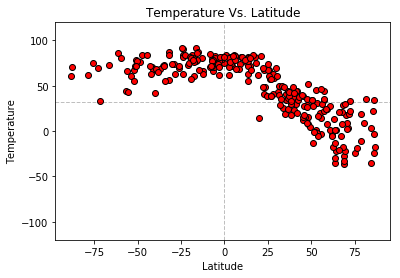

In [23]:
plt.scatter(summary_df["Latitude"],summary_df["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Temperature Vs. Latitude")
plt.xlabel("Latitude") 
plt.ylabel("Temperature")
plt.ylim((-120, 120))
plt.axhline(y=32, linestyle='--', linewidth = 1, color = "black", alpha=.25)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()

In [ ]:
#export to png
plt.savefig("Temperature_Vs_Lat.png")

# Humidity Vs. Latitude

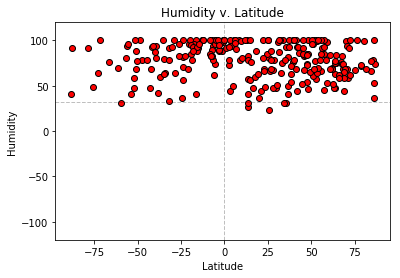

In [22]:
plt.scatter(summary_df["Latitude"],summary_df["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity v. Latitude")
plt.xlabel("Latitude") 
plt.ylabel("Humidity")
plt.ylim((-120, 120))
plt.axhline(y=32, linestyle='--', linewidth = 1, color = "black", alpha=.25)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()

In [ ]:
#export to png
plt.savefig("Humidity_Vs_Lat.png")

# Clouds Vs. Latitude

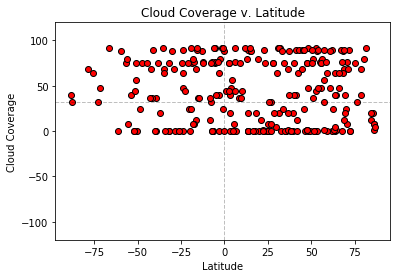

In [24]:
plt.scatter(summary_df["Latitude"],summary_df["Clouds"], marker="o", facecolors="red", edgecolors="black")
plt.title("Cloud Coverage v. Latitude")
plt.xlabel("Latitude") 
plt.ylabel("Cloud Coverage")
plt.ylim((-120, 120))
plt.axhline(y=32, linestyle='--', linewidth = 1, color = "black", alpha=.25)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()

In [ ]:
#export to png
plt.savefig("Clouds_Vs_Lat.png")

# Wind Speed Vs. Latitude

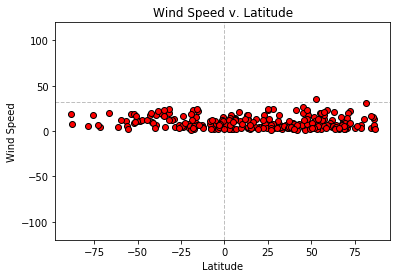

In [25]:
plt.scatter(summary_df["Latitude"],summary_df["Wind"], marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed v. Latitude")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed")
plt.ylim((-120, 120))
plt.axhline(y=32, linestyle='--', linewidth = 1, color = "black", alpha=.25)
plt.axvline(x=0, linestyle = "--", linewidth = 1, color = "black", alpha = .25)
plt.show()

In [ ]:
#export to png
plt.savefig("Wind_Vs_Lat.png")